# Py - RTTOV

[PDF Python Interface Guide - NWP/SAF](https://nwp-saf.eumetsat.int/site/download/documentation/rtm/docs_rttov12/rttov-wrapper.pdf)



In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
import xarray
import glob
# System information
import numpy as np
import os, sys, glob
print(sys.executable)
print(sys.version_info)
import pandas as pd
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)
sys.path.append(os.getcwd()+'/../cds-backend/code/')
import cds_eua3 as eua
import pickle
import multiprocessing
from functools import partial
import netCDF4 as nc
import datetime

def to_days_since(time):
    reference = datetime.datetime(1900, 1, 1)
    fstart = datetime.datetime(int(str(time)[:4]),int(str(time)[-2:]),15)
    offset = fstart - reference
    return offset.days

/users/staff/a1400070/.conda/envs/uv/bin/python
sys.version_info(major=3, minor=9, micro=6, releaselevel='final', serial=0)


/tmp/ipykernel_2012557/2656202038.py:16: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [2]:
def compare_msu(re, da, channel, rss_file, plot_color = 'blue',station_lat = 48.20, station_lon = 16.37, anomaly = False, anomaly_s = 1981, anomaly_e = 2011):
    
    dates = []
    for i in range(len(da)):
        dates.append(pd.to_datetime(str(da[i])[:4]+'-'+str(da[i])[4:]))

    rss = xarray.open_dataset(rss_file, decode_times=False)
    rss_vie = rss.sel(latitude = station_lat, longitude = station_lon, method='nearest')

    time = pd.to_datetime('1978-1-1 0:0:0')
    rss_dates = []
    for i in rss_vie.months.values:
        rss_dates.append(time + pd.DateOffset(months=i))
    
    if anomaly:
        mean = [0]*12
        count = [0]*12
        yrlist = [i for i in range(anomaly_s,anomaly_e + 1 )]
        for i in range(len(re)):
            if int(str(da[i])[:4]) in yrlist:
                if not isinstance(re[i], float):
                    for j in range(1,13):
                        if not np.isnan(re[i][0][channel]):
                            if j == int(str(da[i])[-2:]):
                                mean[j-1] += re[i][0][channel]
                                count[j-1] += 1
        for j in range(1,13):
            mean[j-1] = mean[j-1]/count[j-1]

        
#     for i in range(len(re)):
#         if not isinstance(re[i], float):
#             if not np.isnan(re[i][0][0]):
#                 if anomaly:
#                     for j in range(1,13):
#                         if j == int(str(da[i])[-2:]):
#                             re[i][0][channel] -= mean[j-1]

#                 else:
#                     re[i][0][channel] -= 0

#         else:
#             re[i] = [[np.nan, np.nan, np.nan]]

    a = np.resize(re,(len(re),3))

    plt.rcParams['figure.figsize'] = [12, 8]

    fig, ax = plt.subplots()

    ax.grid()
    if anomaly:
        ax.set(xlabel='date', ylabel='reflectivity anomaly [K]',
           title='Anomaly MSU_'+str(channel + 2))
    else:
        ax.set(xlabel='date', ylabel='reflectivity [K]',
           title='MSU_'+str(channel + 2))
    ax.plot(dates, a[:,channel], color=plot_color, label='MSU_'+str(channel + 2), linewidth=4, alpha=0.8)
    ax.plot(rss_dates, rss_vie.brightness_temperature.values, color='black', label='RSS')
    ax.legend()

    fig.tight_layout(pad=2.0)
    plt.show()
    plt.close()

### TLS - lower stratosphere - MSU 4
### TTS - troposphere stratosphere - MSU 3
### TMT - mid troposphere - MSU 2
### TTT - ?
### TLT - lower troposphere
### 

### Global monthly anomaly of atmosphere layer temperatures derived from microwave radiometers (MSU/AMSU) on NOAA and NASA polar orbiting satellites. The anomalies are deviations from 1981-2010 mean.

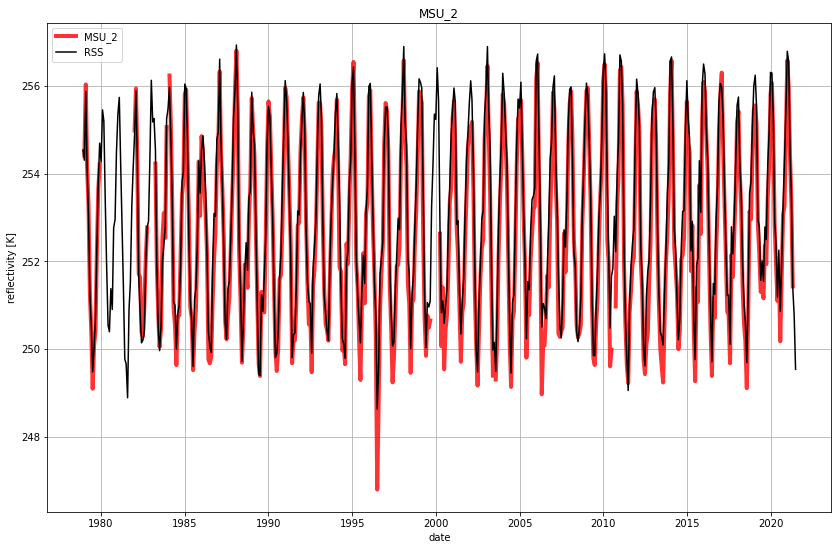

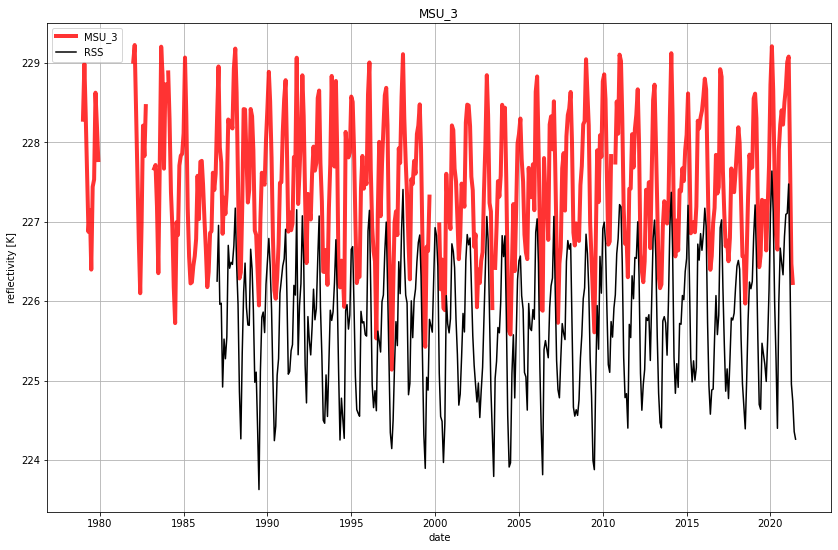

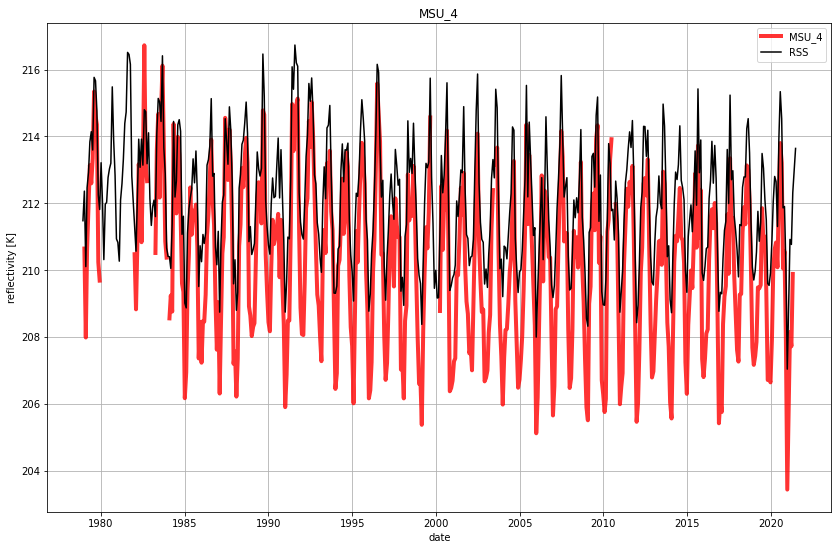

In [3]:
stat="68842"
statlist = glob.glob('/mnt/users/scratch/leo/scratch/converted_v7/*' + stat + '*_CEUAS_merged_v1.nc')
df = eua.CDMDataset(filename = statlist[0]).to_dataframe(groups=['observations_table'], variables=['latitude', 'longitude'])

re = pickle.load( open( "./rttov_out/"+stat+"/"+stat+"_night_refl.p", "rb" ) )
da = pickle.load( open( "./rttov_out/"+stat+"/"+stat+"_night_dates.p", "rb" ) )
re_new = []
for i in re:
    if not isinstance(i, float):
        if isinstance(i, list):
            re_new.append(np.array([i]))
        else:
            re_new.append(np.array(i))
    else:
        re_new.append(np.array([np.array([np.nan, np.nan, np.nan])]))

compare_msu(re, da, 0, './RSS_Tb_Maps_ch_TMT_V4_0.nc',plot_color='red', anomaly=False ,station_lat = df.latitude.iloc[0], station_lon = df.longitude.iloc[0])
compare_msu(re, da, 1, './RSS_Tb_Maps_ch_TTS_V4_0.nc',plot_color='red', anomaly=False ,station_lat = df.latitude.iloc[0], station_lon = df.longitude.iloc[0])
compare_msu(re, da, 2, './RSS_Tb_Maps_ch_TLS_V4_0.nc',plot_color='red', anomaly=False ,station_lat = df.latitude.iloc[0], station_lon = df.longitude.iloc[0])
# compare_msu(re, ch, da, 0, './RSS_Tb_Anom_Maps_ch_TMT_V4_0.nc',plot_color='red', anomaly=True )

In [4]:
re = pickle.load( open( "./rttov_out/"+stat+"/"+stat+"_day_refl.p", "rb" ) )
re1 = pickle.load( open( "./rttov_out/"+stat+"/"+stat+"_night_refl.p", "rb" ) )

In [5]:
re = np.nanmean([re,re1], axis=0)

/tmp/ipykernel_2012557/2679940011.py:1: RuntimeWarning: Mean of empty slice
  re = np.nanmean([re,re1], axis=0)


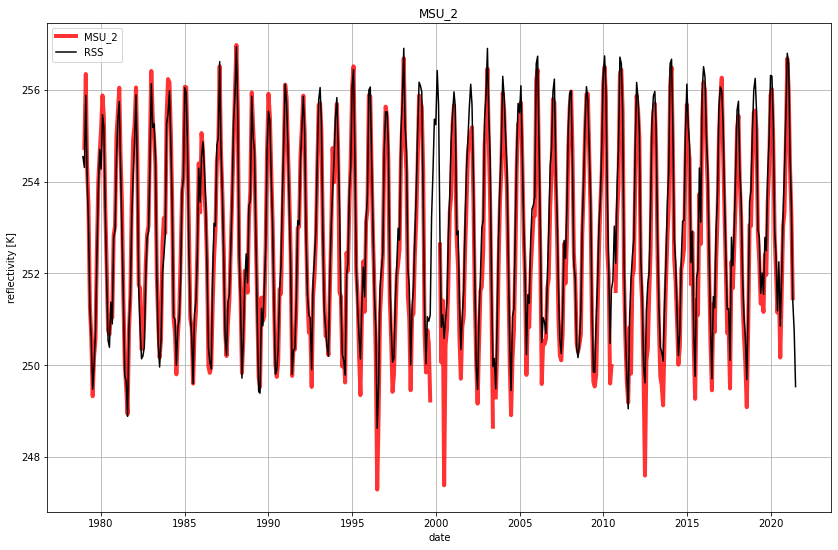

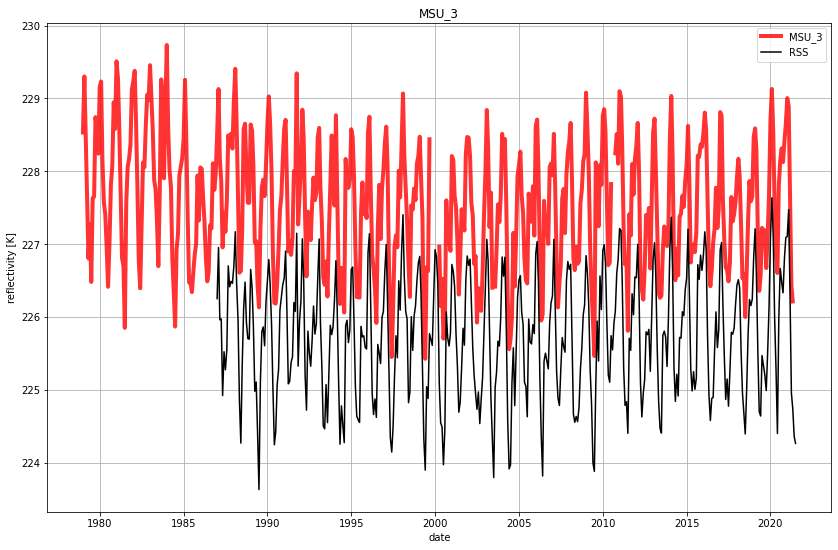

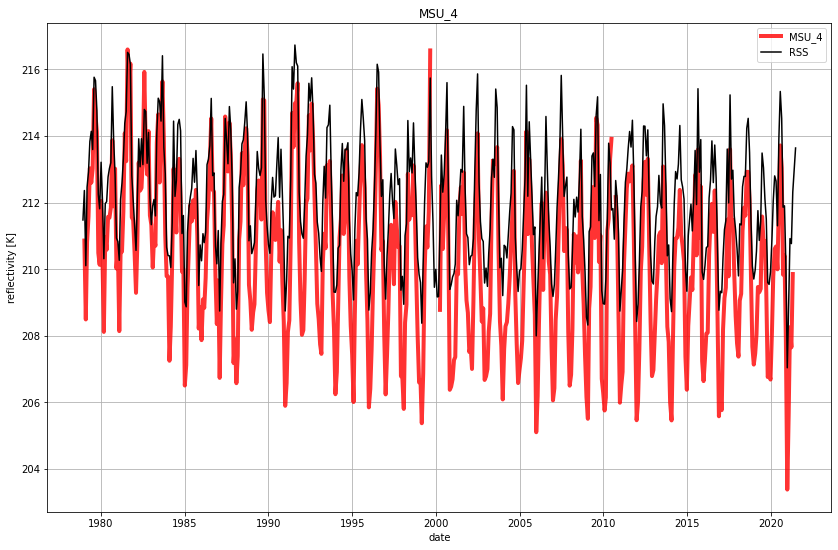

In [6]:
stat="68842"
statlist = glob.glob('/mnt/users/scratch/leo/scratch/converted_v7/*' + stat + '*_CEUAS_merged_v1.nc')
df = eua.CDMDataset(filename = statlist[0]).to_dataframe(groups=['observations_table'], variables=['latitude', 'longitude'])

# re = pickle.load( open( "./rttov_out/"+stat+"/"+stat+"_day_refl.p", "rb" ) )
da = pickle.load( open( "./rttov_out/"+stat+"/"+stat+"_day_dates.p", "rb" ) )
re_new = []
for i in re:
    if not isinstance(i, float):
        if isinstance(i, list):
            re_new.append(np.array([i]))
        else:
            re_new.append(np.array(i))
    else:
        re_new.append(np.array([np.array([np.nan, np.nan, np.nan])]))

compare_msu(re, da, 0, './RSS_Tb_Maps_ch_TMT_V4_0.nc',plot_color='red', anomaly=False ,station_lat = df.latitude.iloc[0], station_lon = df.longitude.iloc[0])
compare_msu(re, da, 1, './RSS_Tb_Maps_ch_TTS_V4_0.nc',plot_color='red', anomaly=False ,station_lat = df.latitude.iloc[0], station_lon = df.longitude.iloc[0])
compare_msu(re, da, 2, './RSS_Tb_Maps_ch_TLS_V4_0.nc',plot_color='red', anomaly=False ,station_lat = df.latitude.iloc[0], station_lon = df.longitude.iloc[0])
# compare_msu(re, ch, da, 0, './RSS_Tb_Anom_Maps_ch_TMT_V4_0.nc',plot_color='red', anomaly=True )day